In [4]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-225-1 model fitting.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Aldehyde,Unnamed: 4,Imine ester,Intermediate 1,Intermediate 2,Unnamed: 8,Ester fuel,...,Unnamed: 11,Unnamed: 12,Phenol waste,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Fuel dimer,Alanine waste,Unnamed: 20
0,-360,0.000000,4456.17,6.000000,0.00000,0.000000,0,0,1.0,48.000000,...,0.000000,0.00,0.000000,1.0,0.000,0.0000,0.00,0.000000,0.000000,NaN
1,0,6.000000,3920.48,5.949246,33.44610,0.050754,0,0,64658.8,45.652071,...,0.501531,2546.88,1.799144,96137.6,453.930,142.4300,4873.37,0.067191,2.298991,NaN
2,294,10.900000,1673.73,5.841062,45.54290,0.158938,0,0,28058.3,44.763159,...,0.495633,1624.36,2.595656,43855.2,238.276,125.6580,3426.98,0.126258,3.443352,NaN
3,545,15.083333,1689.95,5.936119,18.18610,0.063881,0,0,27545.7,44.127214,...,0.503855,2065.24,3.310625,43068.2,158.769,71.0989,4093.67,0.071904,4.140000,NaN
4,796,19.266667,1674.92,6.003733,-1.04139,-0.003733,0,0,27040.6,43.629645,...,0.389509,2469.41,3.984206,42489.6,196.729,123.7760,5023.64,0.123886,5.028090,NaN


In [5]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Fuel dimer":"Fuel_dimer", "Phenol waste":"Phenol_waste", "Alanine waste":"Alanine_waste", \
                             "Intermediate 1":"I1", "Intermediate 2":"I2", "Imine ester":"Imine_ester"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Aldehyde,Unnamed: 4,Imine_ester,I1,I2,Unnamed: 8,Fuel,...,Unnamed: 11,Unnamed: 12,Phenol_waste,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Fuel_dimer,Alanine_waste,Unnamed: 20
0,-360,0.000000,4456.17,6.000000,0.00000,0.000000,0,0,1.0,48.000000,...,0.000000,0.00,0.000000,1.0,0.000,0.0000,0.00,0.000000,0.000000,NaN
1,0,6.000000,3920.48,5.949246,33.44610,0.050754,0,0,64658.8,45.652071,...,0.501531,2546.88,1.799144,96137.6,453.930,142.4300,4873.37,0.067191,2.298991,NaN
2,294,10.900000,1673.73,5.841062,45.54290,0.158938,0,0,28058.3,44.763159,...,0.495633,1624.36,2.595656,43855.2,238.276,125.6580,3426.98,0.126258,3.443352,NaN
3,545,15.083333,1689.95,5.936119,18.18610,0.063881,0,0,27545.7,44.127214,...,0.503855,2065.24,3.310625,43068.2,158.769,71.0989,4093.67,0.071904,4.140000,NaN
4,796,19.266667,1674.92,6.003733,-1.04139,-0.003733,0,0,27040.6,43.629645,...,0.389509,2469.41,3.984206,42489.6,196.729,123.7760,5023.64,0.123886,5.028090,NaN


Derivative(alanine_waste, t; k1, k10, k2, k3, k4, k5, k6, k7, k8, k9) = k1*fuel + k10*imine_ester + k7*i2
Derivative(aldehyde, t; k1, k10, k2, k3, k4, k5, k6, k7, k8, k9) = k10*imine_ester - k4*aldehyde*fuel + k5*i1 + k7*i2
Derivative(fuel, t; k1, k10, k2, k3, k4, k5, k6, k7, k8, k9) = -k1*fuel - 2*k2*fuel**2 - k4*aldehyde*fuel + k5*i1
Derivative(fuel_dimer, t; k1, k10, k2, k3, k4, k5, k6, k7, k8, k9) = k2*fuel**2 - k3*fuel_dimer
Derivative(i1, t; k1, k10, k2, k3, k4, k5, k6, k7, k8, k9) = k4*aldehyde*fuel - k5*i1 - k6*i1 - k8*i1 + k9*imine_ester
Derivative(i2, t; k1, k10, k2, k3, k4, k5, k6, k7, k8, k9) = k6*i1 - k7*i2
Derivative(imine_ester, t; k1, k10, k2, k3, k4, k5, k6, k7, k8, k9) = -k10*imine_ester + k8*i1 - k9*imine_ester
Derivative(phenol_waste, t; k1, k10, k2, k3, k4, k5, k6, k7, k8, k9) = k1*fuel + k10*imine_ester + k2*fuel**2 + k3*fuel_dimer + k6*i1
Derivative(waste_dimer, t; k1, k10, k2, k3, k4, k5, k6, k7, k8, k9) = k3*fuel_dimer


/Users/AmanoShuntaro/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)



Parameter Value        Standard Deviation
k1        4.445094e-03 None
k10       1.000810e-01 None
k2        0.000000e+00 None
k3        1.222022e-06 None
k4        0.000000e+00 None
k5        8.700000e+01 None
k6        2.000000e+01 None
k7        2.220000e+03 None
k8        3.159994e+00 None
k9        2.261482e-02 None
Status message         CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
Number of iterations   22
Objective              <symfit.core.objectives.LeastSquares object at 0x7facc8c9ff10>
Minimizer              <symfit.core.minimizers.LBFGSB object at 0x7facc8c9fdf0>

Goodness of fit qualifiers:
chi_squared            18.694919058309402
objective_value        9.347459529154701
r_squared              0.9474435744607584
ModelOutput(variables=[alanine_waste, aldehyde, fuel, fuel_dimer, i1, i2, imine_ester, phenol_waste, waste_dimer], output=[[0.00000000e+00 1.28029802e-03 2.56056189e-03 ... 1.12349112e+01
  1.12358918e+01 1.12368724e+01]
 [6.00000000e+00 6.00000000e+00 6.00000

<IPython.core.display.Javascript object>


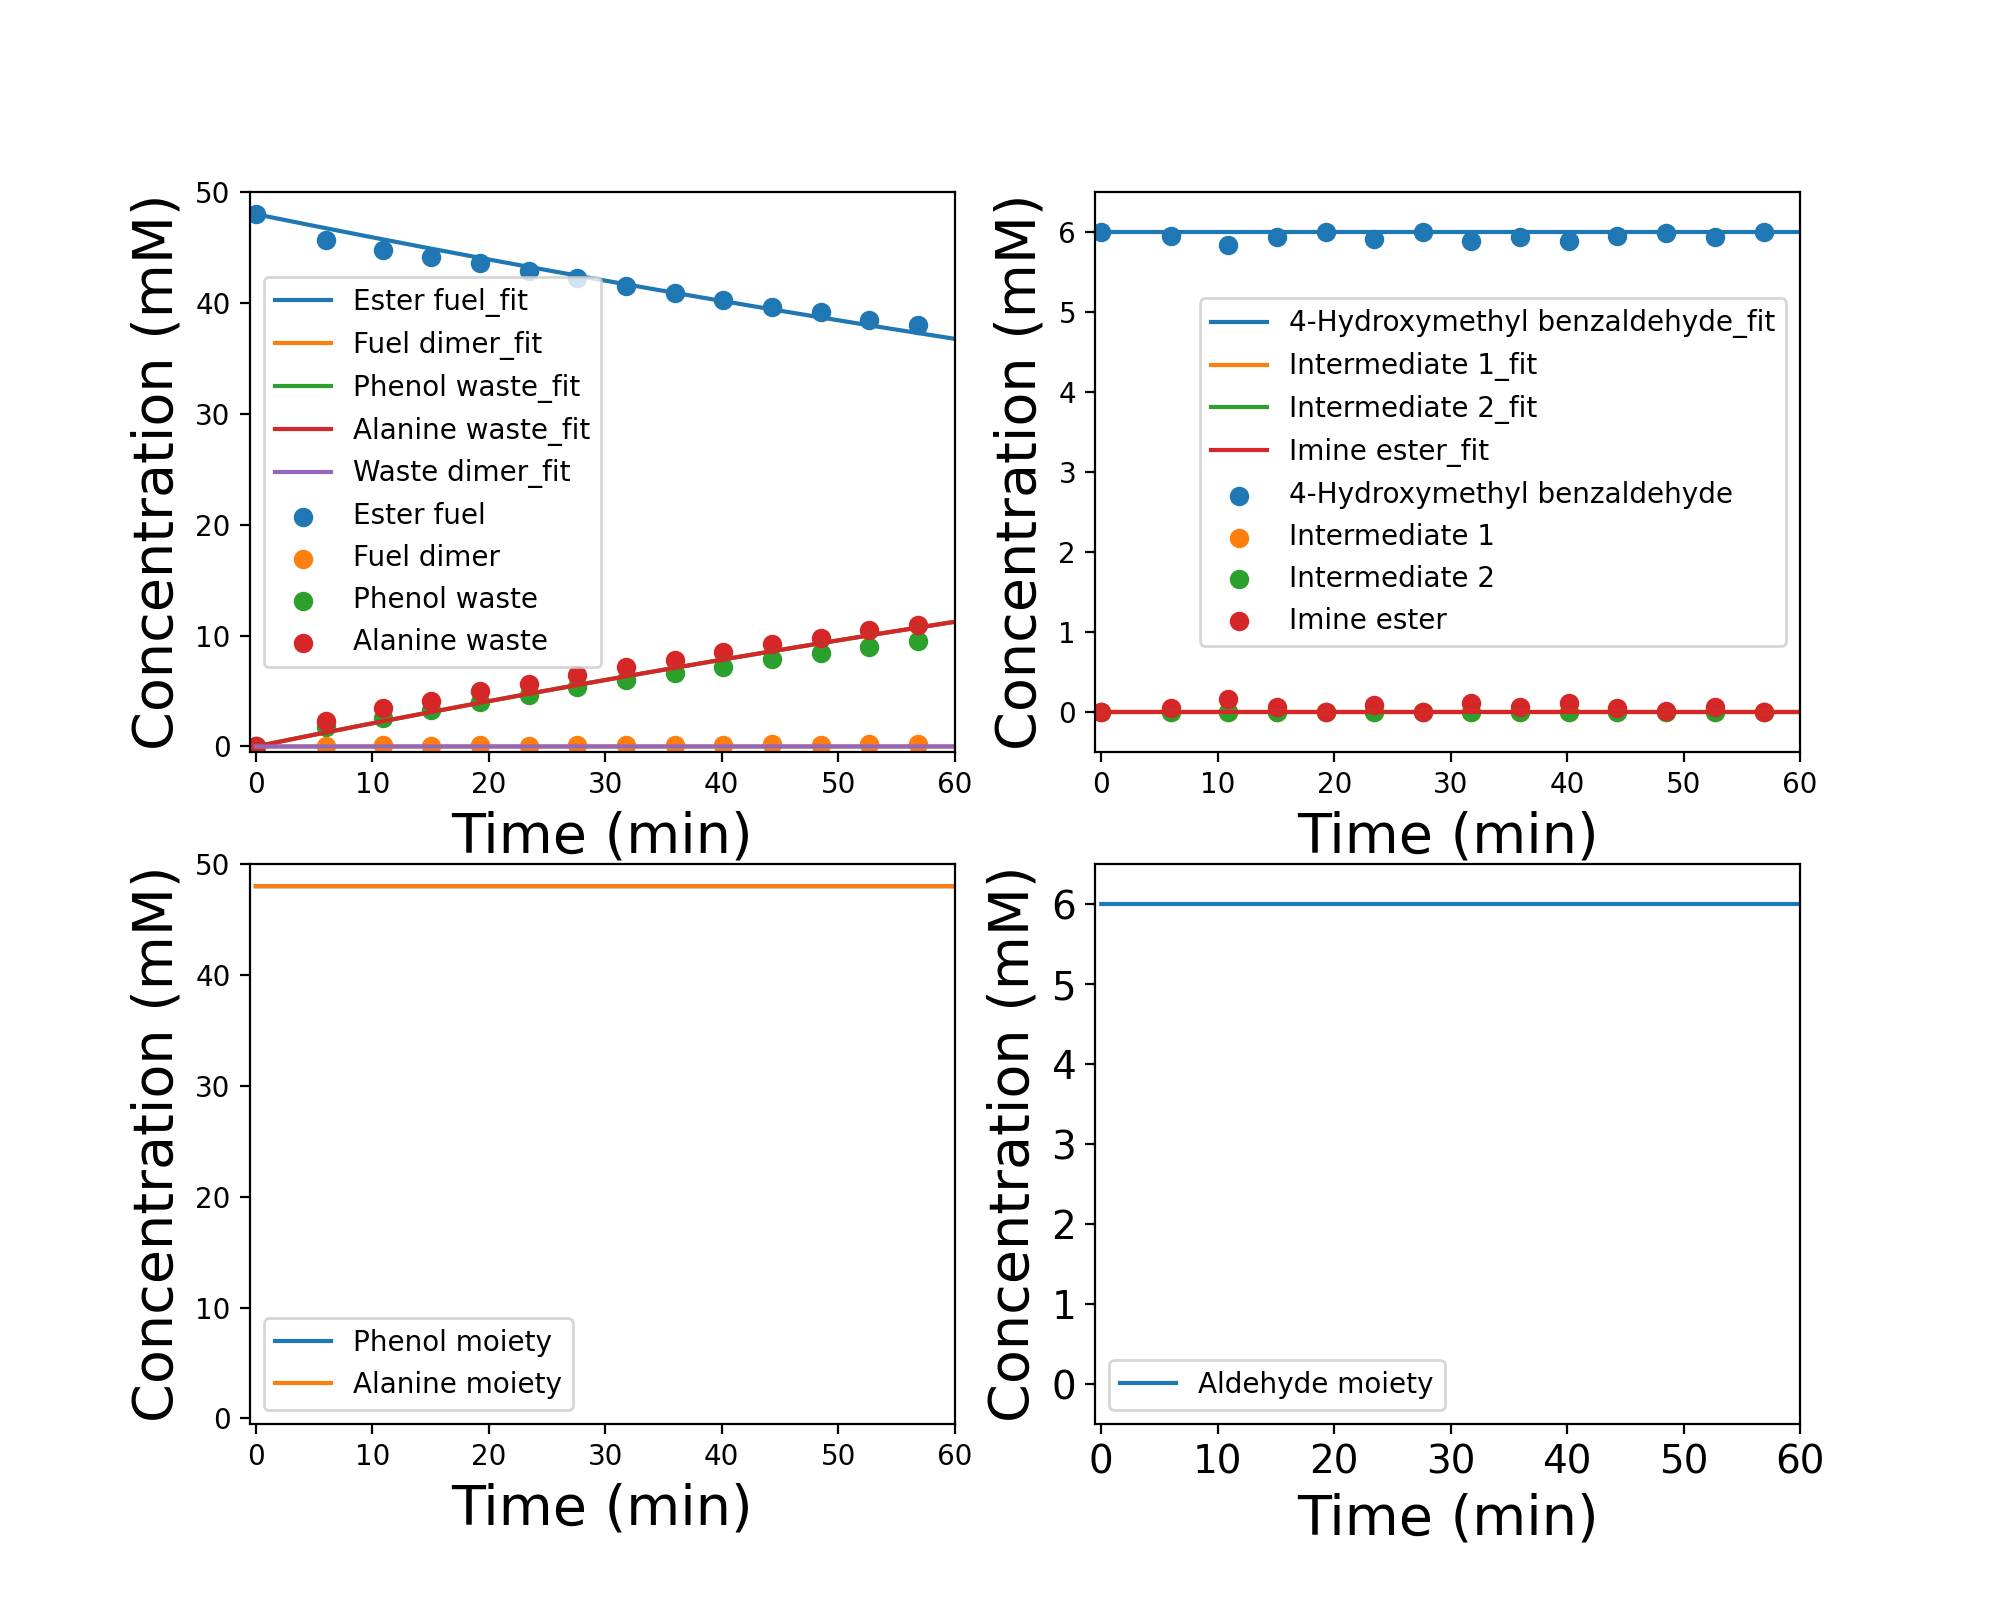

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import Parameter, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-225-1 (pH 6.10) with a detailed model based on concentration, not abundance. The concentration was calculated WITHOUT an external standard.

As the initial values of the rate constants, the values obtained from the manual fitting were used. The fitting was performed by combining automatic and manual fitting.

"""

t, fuel, fuel_dimer, phenol_waste, alanine_waste, waste_dimer, aldehyde, i1, i2, imine_ester = variables('t, fuel, fuel_dimer, phenol_waste, alanine_waste, waste_dimer, aldehyde, i1, i2, imine_ester')
k1 = Parameter('k1', min=0.0); k2 = Parameter('k2', min=0.0); k3 = Parameter('k3', min=0.0); k4 = Parameter('k4', min=0.0)
k5 = Parameter('k5', min=0.0); k6 = Parameter('k6', min=0.0); k7 = Parameter('k7', min=0.0); k8 = Parameter('k8', min=0.0)
k9 = Parameter('k9', min=0.0); k10 = Parameter('k10', min=0.0)
k1.value = 0.00083; k2.value = 0.000001; k3.value = 0.000001; k4.value = 0.00249; k5.value = 87.0
k6.value = 20.0; k7.value = 2220.0; k8.value = 3.16; k9.value = 0.0224; k10.value = 0.1

t_data = np.array(reaction_data.Time, dtype=np.float64); fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)
fuel_dimer_data = np.array(reaction_data.Fuel_dimer, dtype=np.float64); phenol_waste_data = np.array(reaction_data.Phenol_waste, dtype=np.float64)
alanine_waste_data = np.array(reaction_data.Alanine_waste, dtype=np.float64)
aldehyde_data = np.array(reaction_data.Aldehyde, dtype=np.float64); i1_data = np.array(reaction_data.I1, dtype=np.float64)
i2_data = np.array(reaction_data.I2, dtype=np.float64); imine_ester_data = np.array(reaction_data.Imine_ester, dtype=np.float64)

t0 = 0.0; fuel0 = 48.0; fuel_dimer0 = 0.0; phenol_waste0 = 0.0; alanine_waste0 = 0.0; waste_dimer0 = 0.0
aldehyde0 = 6.0; i10 = 0.0; i20 = 0.0; imine_ester0 = 0.0

model_dict = {
    D(fuel, t): -k1*fuel-2*k2*fuel**2-k4*fuel*aldehyde+k5*i1,
    D(fuel_dimer, t): k2*fuel**2-k3*fuel_dimer,
    D(phenol_waste, t): k1*fuel+k2*fuel**2+k3*fuel_dimer+k6*i1+k10*imine_ester,
    D(alanine_waste, t): k1*fuel+k7*i2+k10*imine_ester,
    D(waste_dimer, t): k3*fuel_dimer,
    D(aldehyde, t): -k4*fuel*aldehyde+k5*i1+k7*i2+k10*imine_ester,
    D(i1, t): k4*fuel*aldehyde-k5*i1-k6*i1-k8*i1+k9*imine_ester,
    D(i2, t): k6*i1-k7*i2,
    D(imine_ester, t): k8*i1-k9*imine_ester-k10*imine_ester
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0, fuel_dimer: fuel_dimer0, phenol_waste: phenol_waste0, alanine_waste: alanine_waste0, \
                                          waste_dimer: waste_dimer0, aldehyde: aldehyde0, i1: i10, i2: i20, imine_ester: imine_ester0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data, fuel_dimer=fuel_dimer_data, phenol_waste=phenol_waste_data, alanine_waste=alanine_waste_data, \
         waste_dimer=None, aldehyde=aldehyde_data, i1=i1_data, i2=i2_data, imine_ester=imine_ester_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
alanine_waste, aldehyde, fuel, fuel_dimer, i1, i2, imine_ester, phenol_waste, waste_dimer = ode_model(t=tvec, **fit_result.params)
print(ode_model(t=tvec, **fit_result.params))


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))

ax1.plot(tvec, fuel, label='Ester fuel_fit')
ax1.plot(tvec, fuel_dimer, label='Fuel dimer_fit')
ax1.plot(tvec, phenol_waste, label='Phenol waste_fit')
ax1.plot(tvec, alanine_waste, label='Alanine waste_fit')
ax1.plot(tvec, waste_dimer, label='Waste dimer_fit')

ax1.scatter(t_data, fuel_data, label='Ester fuel')
ax1.scatter(t_data, fuel_dimer_data, label='Fuel dimer')
ax1.scatter(t_data, phenol_waste_data, label='Phenol waste')
ax1.scatter(t_data, alanine_waste_data, label='Alanine waste')

ax1.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax1.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
ax1.set_xlim(-0.5, 60.0)
ax1.set_ylim(-0.5, 50.0)
ax1.legend(loc='best')

ax2.plot(tvec, aldehyde, label='4-Hydroxymethyl benzaldehyde_fit')
ax2.plot(tvec, i1, label='Intermediate 1_fit')
ax2.plot(tvec, i2, label='Intermediate 2_fit')
ax2.plot(tvec, imine_ester, label='Imine ester_fit')

ax2.scatter(t_data, aldehyde_data, label='4-Hydroxymethyl benzaldehyde')
ax2.scatter(t_data, i1_data, label='Intermediate 1')
ax2.scatter(t_data, i2_data, label='Intermediate 2')
ax2.scatter(t_data, imine_ester_data, label='Imine ester')

ax2.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax2.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
ax2.set_xlim(-0.5, 60.0)
ax2.set_ylim(-0.5, 6.5)
ax2.legend(loc='best')

#Check the mass balance of the phenol moiety, alanine moiety, and 4-hydroxymethyl benzaldehyde moiety
ax3.plot(tvec, fuel+phenol_waste+fuel_dimer+i1+imine_ester, label='Phenol moiety')
ax3.plot(tvec, fuel+alanine_waste+2*fuel_dimer+2*waste_dimer+i1+i2+imine_ester, label='Alanine moiety')
ax3.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax3.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
ax3.set_xlim(-0.5, 60.0)
ax3.set_ylim(-0.5, 50.0)
ax3.legend(loc='best')

ax4.plot(tvec, aldehyde+i1+i2+imine_ester, label='Aldehyde moiety')
ax4.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax4.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
ax4.set_xlim(-0.5, 60.0)
ax4.set_ylim(-0.5, 6.5)
ax4.legend(loc='best')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()